<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220818_Hotel_Reviews_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/07/03/hotel-reviews-sentiment-analysis-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Datafiniti_Hotel_Reviews_Jun19.csv')

In [14]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

In [18]:
df = data[['reviews.rating', 'reviews.text']]
df.head()

,reviews.rating,reviews.text
0,3,"This hotel was nice and quiet. Did not know, t..."
1,4,We stayed in the king suite with the separatio...
2,3,"Parking was horrible, somebody ran into my ren..."
3,5,Not cheap but excellent location. Price is som...
4,2,If you get the room that they advertised on th...


In [19]:
df.columns = ['ratings', 'text']
df.head()

,ratings,text
0,3,"This hotel was nice and quiet. Did not know, t..."
1,4,We stayed in the king suite with the separatio...
2,3,"Parking was horrible, somebody ran into my ren..."
3,5,Not cheap but excellent location. Price is som...
4,2,If you get the room that they advertised on th...


In [20]:
df.ratings.value_counts()

5    4840
4    2849
3    1190
1     567
2     554
Name: ratings, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ratings  10000 non-null  int64 
 1   text     10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [29]:
ratings = df.ratings.value_counts().index
ratings

Int64Index([5, 4, 3, 1, 2], dtype='int64')

In [30]:
qty = df.ratings.value_counts().values
qty

array([4840, 2849, 1190,  567,  554])

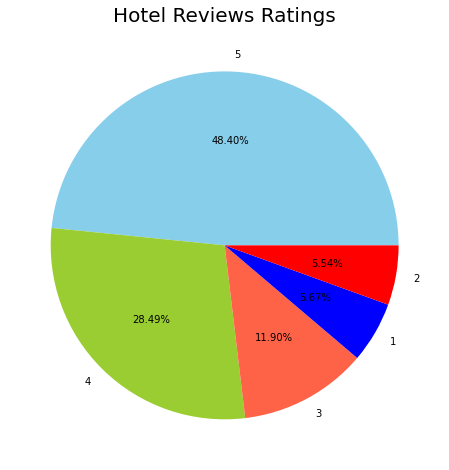

In [36]:
plt.figure(figsize=(10,8))
plt.pie(qty, labels=ratings, colors=['skyblue', 'yellowgreen', 'tomato', 'blue', 'red'], autopct='%1.2f%%')
plt.title('Hotel Reviews Ratings', fontsize=20)
plt.show()

In [37]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['text']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['text']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['text']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['text']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [38]:
df.head()

,ratings,text,Positive,Negative,Neutral,Compound
0,3,"This hotel was nice and quiet. Did not know, t...",0.172,0.000,0.828,0.8271
1,4,We stayed in the king suite with the separatio...,0.112,0.080,0.809,0.2892
2,3,"Parking was horrible, somebody ran into my ren...",0.057,0.063,0.880,-0.0772
3,5,Not cheap but excellent location. Price is som...,0.207,0.159,0.634,0.5033
4,2,If you get the room that they advertised on th...,0.000,0.143,0.857,-0.8089


In [39]:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])
c = sum(df['Compound'])

In [40]:
print('Positive: ', x)
print('Negative: ', y)
print('Neutral: ', z)
print('Compound: ', c)

Positive:  2213.8119999999967
Negative:  294.29399999999816
Neutral:  7491.898999999987
Compound:  7949.057800000011


In [41]:
def sent_analysis(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

In [42]:
sent_analysis(x,y,z)

Neutral
